<a href="https://colab.research.google.com/github/anvichip/haarcascade-facial-features/blob/main/facial_features_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#!kaggle datasets download arnaud58/flickrfaceshq-dataset-ffhq

In [4]:
#alt tommykamaz/faces-dataset-small
!kaggle datasets download tommykamaz/faces-dataset-small

100% 3.97G/3.99G [00:46<00:00, 75.8MB/s]
100% 3.99G/3.99G [00:46<00:00, 91.2MB/s]


In [18]:
#!unzip /content/faces-dataset-small.zip
!unzip /content/fcci_images.zip

Archive:  /content/fcci_images.zip
   creating: content/images/
  inflating: content/images/01723.png  
   creating: content/images/.ipynb_checkpoints/
  inflating: content/images/01713.png  
  inflating: content/images/01750.png  
  inflating: content/images/01720.png  
  inflating: content/images/01724.png  
  inflating: content/images/01719.png  
  inflating: content/images/01754.png  


In [5]:
#!unzip /content/flickrfaceshq-dataset-ffhq.zip

In [28]:
import cv2
from google.colab.patches import cv2_imshow

def detect_eyes_and_mouth(image_path):
    # Read the input image
    print(image_path)
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Load the face cascade classifier
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Load the eye cascade classifier
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    # Load the mouth cascade classifier
    mouth_cascade = cv2.CascadeClassifier('/content/haarcascade_mcs_mouth (1).xml')

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    # Check if a face is detected
    if len(faces) == 0:
      cv2_imshow(img)
      print("No face detected.")
      return

    # Loop over the detected faces
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        # Detect eyes within the face ROI
        eyes = eye_cascade.detectMultiScale(
            roi_gray,
            scaleFactor = 1.1
            #minNeighbors=10,
            #minSize=(50, 50)
        )

        # Initialize a list to store the non-overlapping mouth detections
        non_overlapping_mouths = []

        # Detect mouths within the face ROI
        mouths = mouth_cascade.detectMultiScale(
            roi_gray,
            minNeighbors=10,
            minSize=(100, 100),
        )

        # Sort the mouth detections based on area (largest to smallest)
        mouths = sorted(mouths, key=lambda x: x[2] * x[3], reverse=True)
        eyes = sorted(eyes, key=lambda x: x[2] * x[3], reverse=True)[:2]
        # Check for overlapping between mouth and eye detections
        for (mx, my, mw, mh) in mouths:
            mouth_overlaps = False

            # Check for overlapping with each eye detection
            for (ex, ey, ew, eh) in eyes:
                if (mx + mw >= ex and ex + ew >= mx and my + mh >= ey and ey + eh >= my):
                    mouth_overlaps = True
                    break

            # If there is no overlapping with any eye detection, add the mouth detection to the non-overlapping list
            if not mouth_overlaps:
                non_overlapping_mouths.append((mx, my, mw, mh))

        # Draw rectangles around the eye regions
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 255), 2)

        # Draw rectangle around the largest non-overlapping mouth
        if non_overlapping_mouths:
            (mx, my, mw, mh) = non_overlapping_mouths[0]
            cv2.rectangle(roi_color, (mx, my), (mx+mw, my+mh), (255, 0, 0), 2)
        # for (ex, ey, ew, eh) in faces:
        #     cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 255), 2)


    # Display the image with detected eyes and mouth
    cv2_imshow(img)
    print(image_path)
    print(faces)
    print("eyes coordinates:" + str(eyes))
    print("mouth coordinates:" + str(non_overlapping_mouths))
    cv2.waitKey(0)
    cv2.destroyAllWindows()


/content/01753.png


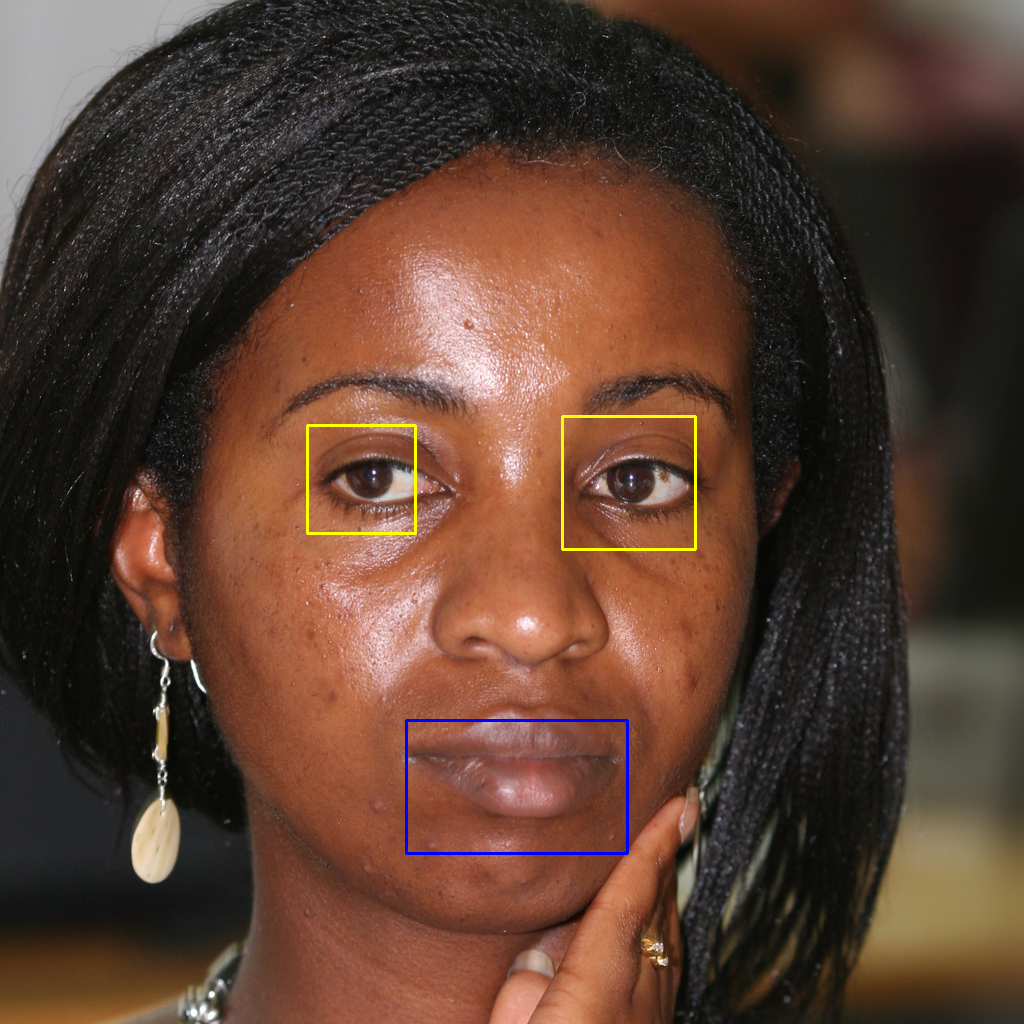

/content/01753.png
[[195 239 657 657]]
eyes coordinates:[array([367, 177, 133, 133], dtype=int32), array([112, 186, 108, 108], dtype=int32)]
mouth coordinates:[(211, 481, 221, 133)]


In [29]:
import os

#directory = os.listdir('/content/fcci_images.zip')

# for image in directory:
#     image_path = os.path.join('/content/fcci_images.zip', image)
#     detect_eyes_and_mouth(image_path)
image_path = '/content/01753.png'
detect_eyes_and_mouth(image_path)

/content/01720.png


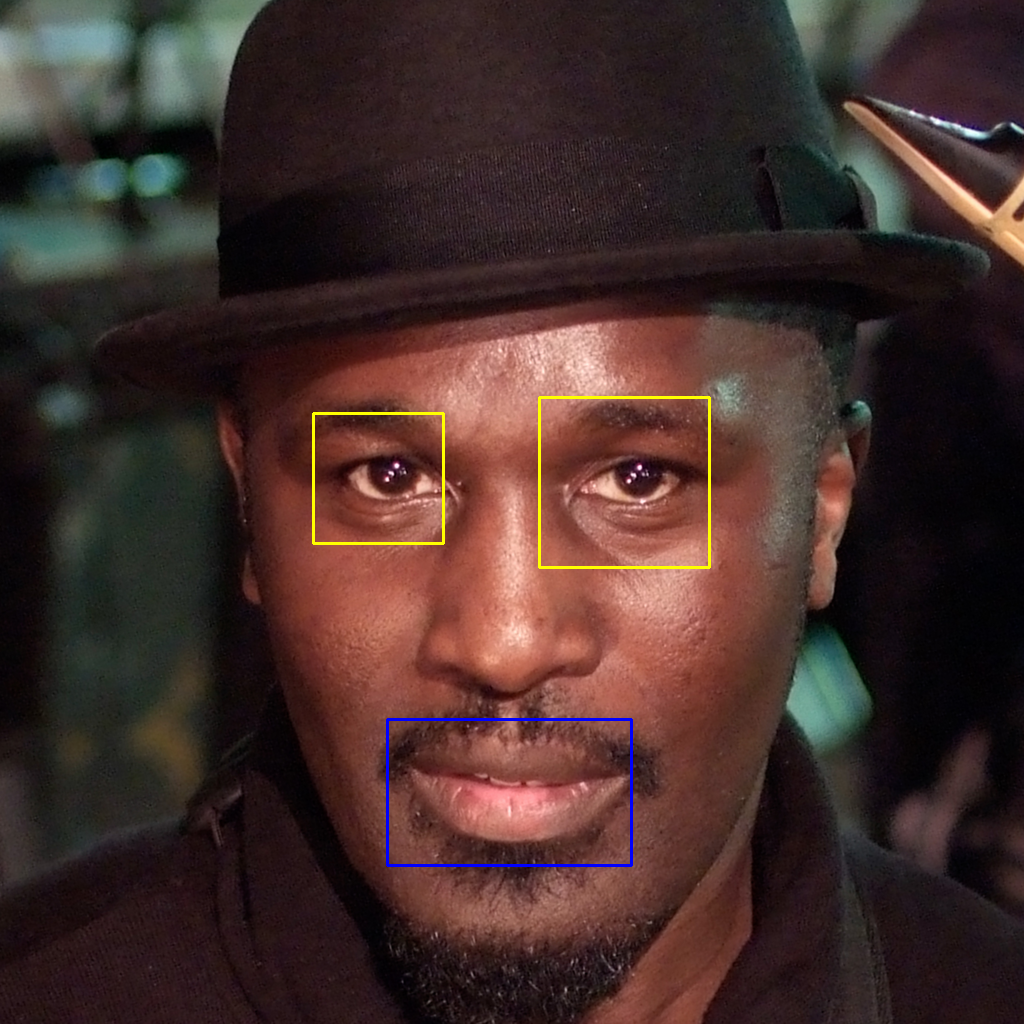

/content/01720.png
[[207 275 599 599]]
eyes coordinates:[array([332, 122, 170, 170], dtype=int32), array([106, 138, 130, 130], dtype=int32)]
mouth coordinates:[(180, 444, 244, 146)]


In [36]:
image_path = '/content/01720.png'
detect_eyes_and_mouth(image_path)

/content/01759.png


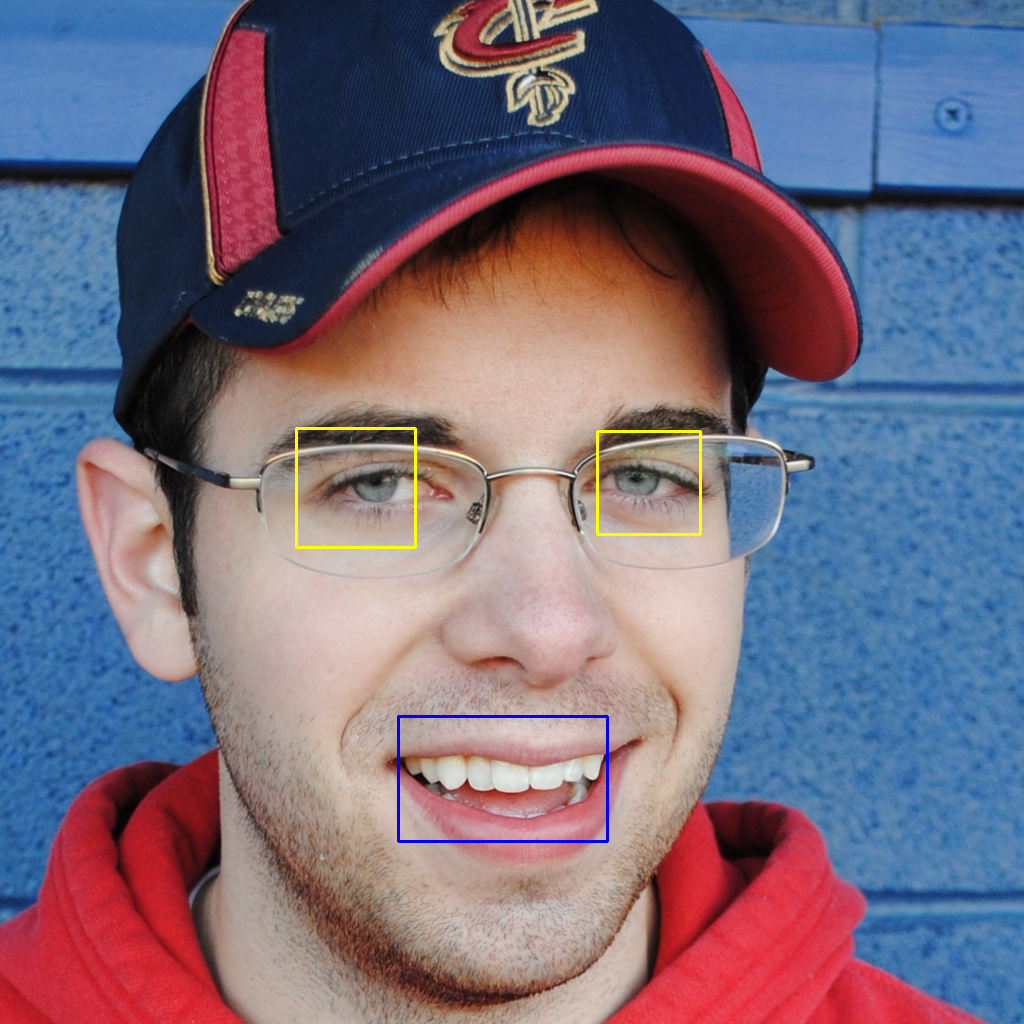

/content/01759.png
[[235 271 578 578]]
eyes coordinates:[array([ 61, 157, 119, 119], dtype=int32), array([362, 160, 103, 103], dtype=int32)]
mouth coordinates:[(163, 445, 209, 125)]


In [32]:
image_path = '/content/01759.png'
detect_eyes_and_mouth(image_path)

/content/01713.png


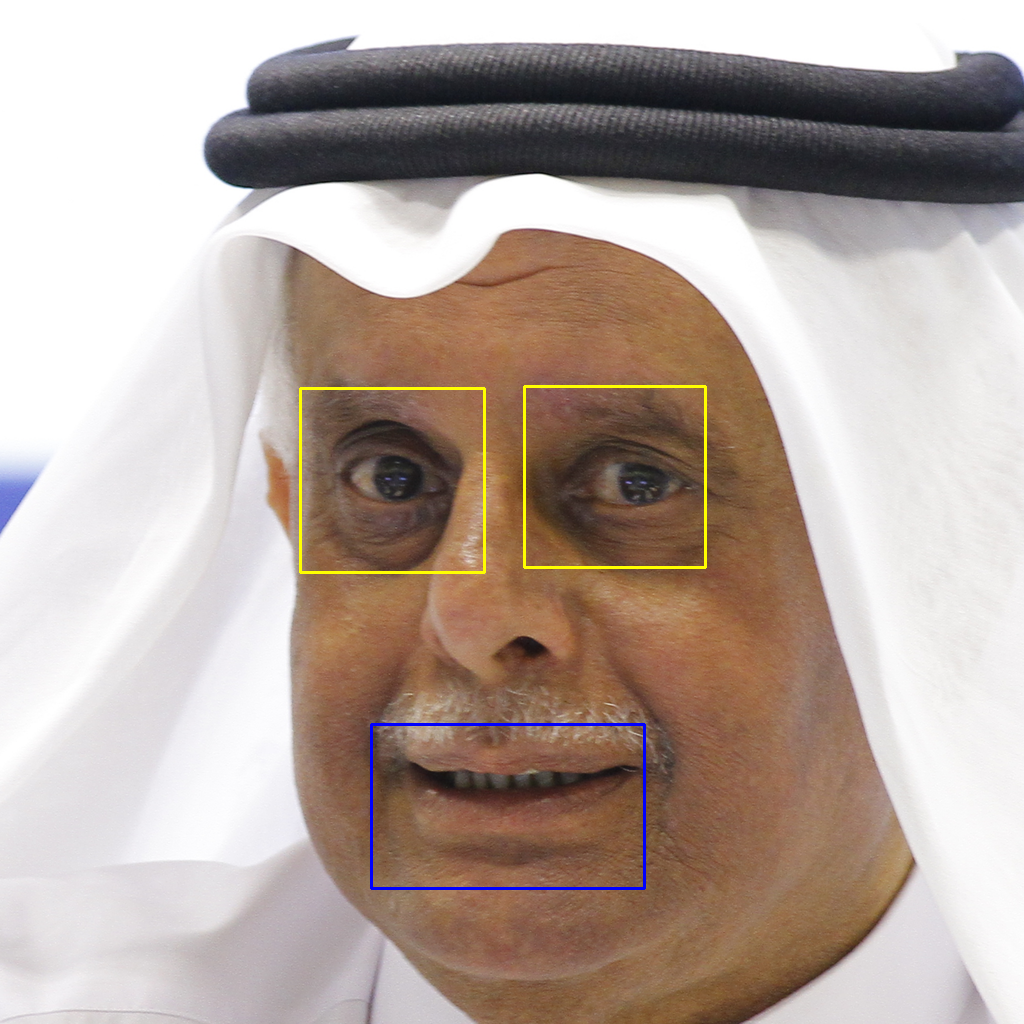

/content/01713.png
[[148 245 690 690]]
eyes coordinates:[array([152, 143, 184, 184], dtype=int32), array([376, 141, 181, 181], dtype=int32)]
mouth coordinates:[(223, 479, 273, 164)]


In [35]:
image_path = '/content/01713.png'
detect_eyes_and_mouth(image_path)

/content/01763.png


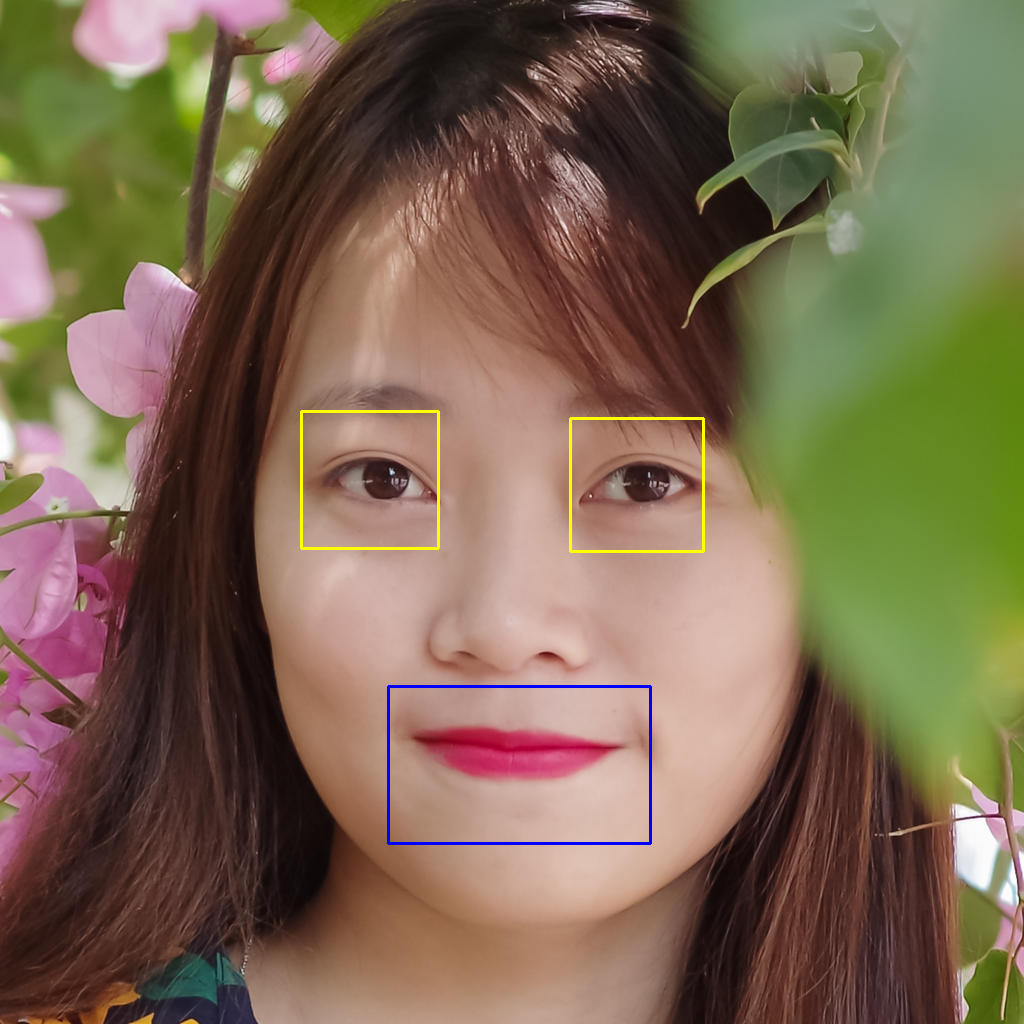

/content/01763.png
[[186 253 635 635]]
eyes coordinates:[array([115, 158, 137, 137], dtype=int32), array([384, 165, 133, 133], dtype=int32)]
mouth coordinates:[(202, 433, 262, 157)]


In [34]:
image_path = '/content/01763.png'
detect_eyes_and_mouth(image_path)

In [16]:
#!zip -r /content/images.zip /content/images

  adding: content/images/ (stored 0%)
  adding: content/images/01723.png (deflated 0%)
  adding: content/images/.ipynb_checkpoints/ (stored 0%)
  adding: content/images/01713.png (deflated 0%)
  adding: content/images/01750.png (deflated 0%)
  adding: content/images/01720.png (deflated 0%)
  adding: content/images/01724.png (deflated 0%)
  adding: content/images/01719.png (deflated 0%)
  adding: content/images/01754.png (deflated 0%)
